## 4.5. Kesifsel Veri Analizi - 1. Tek Degiskenli Analiz - Odev

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
# Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. 

states = pd.read_csv('states_all.csv')
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
states.isnull().sum()/states.shape[0]*100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
GRADES_ALL_G                     4.839650
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62

In [4]:
states.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [5]:
# tum sutunlardaki eksik degerleri, o sutunun ortalamasi ile doldurduk
# 5. soruda ayrica istedigi icin simdilik math ve reading scorelari dahil etmeyecegim

na_list = ['ENROLL', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE',
           'GRADES_PK_G', 'GRADES_KG_G','GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G','GRADES_9_12_G',
           'GRADES_ALL_G']
for col in na_list:
    states.loc[:, col].fillna(states.loc[:, col].mean(), inplace=True)

In [6]:
# 1
# Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

states.describe(include='all')

# primary_key ve state sutunlari kategorik veriler icermekte. 

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715,1715,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,565.000000,602.000000,650.000000,562.000000
unique,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012_TENNESSEE,TENNESSEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,NaN,NaN,9.568621,9.008956e+05,1.013847e+07,9.888707e+05,4.784665e+06,4.732787e+06,1.033950e+07,5.431992e+06,...,77997.995523,76054.685450,65785.422981,5.210620e+05,2.612965e+05,1.030010e+06,9.285505,10.343482,7.681805,6.612601
min,NaN,NaN,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,NaN,NaN,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,1.570157e+06,...,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05,232.000000,272.000000,215.000000,260.000000
50%,NaN,NaN,2002.000000,9.175416e+05,8.363904e+06,6.890720e+05,3.920971e+06,3.566484e+06,8.488521e+06,4.224716e+06,...,51999.000000,50447.000000,40774.000000,5.779547e+05,2.820691e+05,6.809780e+05,238.000000,280.500000,220.000000,265.000000
75%,NaN,NaN,2010.000000,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,77052.000000,76719.500000,68023.000000,5.779547e+05,2.820691e+05,1.002840e+06,242.000000,286.000000,224.000000,268.000000


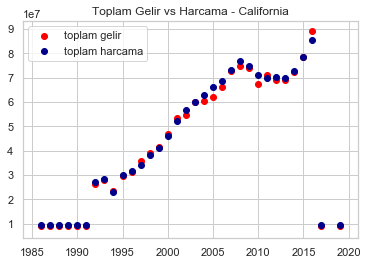

In [7]:
# 2
# Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin 
# doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

california = states.loc[states["STATE"]=='CALIFORNIA']
plt.figure(figsize=(6,4))
plt.title('Toplam Gelir vs Harcama - California')
plt.scatter(california['YEAR'],california['TOTAL_REVENUE'], color='red', label='toplam gelir')
plt.scatter(california['YEAR'],california['TOTAL_EXPENDITURE'], color='darkblue', label='toplam harcama')
plt.legend()
plt.show()

# gelir arttikca harcama da atriyor diyebiliriz. Her ikisi de zamanla artis gostermekte. 
# 1990lar ve oncesi ile 2016 sonrasi gibi aykiri degerler bulunuyor gibi gozukuyor. 
# Onlari dahil etmezsek 1900lerin basinda en dusuk ve 2015/2016 yillarinda da her iki degiskendeki en yuksek degerleri goruyoruz.

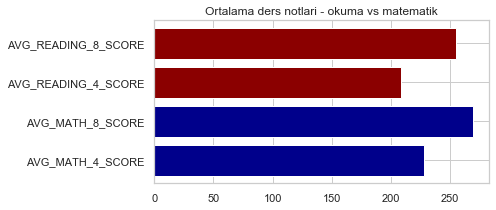

In [8]:
# 3
# Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

plt.figure(figsize=(6,3))
plt.barh(california[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].mean().index,
         california[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].mean(),
        color=['darkblue','darkblue','darkred','darkred'])
plt.title('Ortalama ders notlari - okuma vs matematik')
plt.show()

# Ortalamalarina gore karsilastirdigimizda, cok yakin olmakla beraber matematik dersinde daha basarililar diyebiliriz.

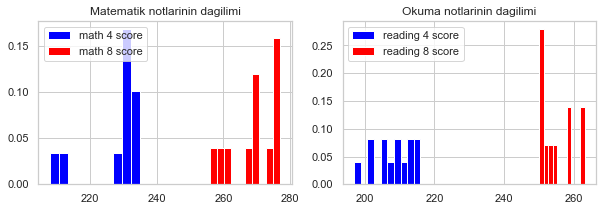

In [9]:
# 4
# Matematik ve okuma notlarının dağılımı nedir?

bins=10
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(california.AVG_MATH_4_SCORE, bins, normed=True, color='blue', label='math 4 score')
plt.hist(california.AVG_MATH_8_SCORE, bins, normed=True, color='red', label='math 8 score')
plt.title('Matematik notlarinin dagilimi')
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.hist(california.AVG_READING_4_SCORE, normed=True, color='blue', label='reading 4 score')
plt.hist(california.AVG_READING_8_SCORE, normed=True, color='red', label='reading 8 score')
plt.title('Okuma notlarinin dagilimi')
plt.legend(loc="upper left")
plt.show()

# Matematik notlarinin dagilimi sola carpik, okuma notlarinin dagilimi da da saga carpik.

In [10]:
# 5
# Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. 
# Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. 
# Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

score = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
cal_mean = california.copy()
cal_median = california.copy()
cal_interpolate = california.copy()
for col in score:
    cal_mean.loc[:, col].fillna(cal_mean.loc[:, col].mean(),inplace=True)
    cal_median.loc[:, col].fillna(cal_median.loc[:, col].median(),inplace=True)
    cal_interpolate.loc[:, col].fillna(cal_interpolate.loc[:, col].interpolate(),inplace=True)
    

# asagida her uc yontemin dagilim uzerindeki etkisini gorebiliriz. 
# mean ve median ile denedigimiz yontemler normal dagilima daha yakin iken, enterpolasyon yonteminde saga ve sola 
# carpiklik gozlemlemeye devam ediyoruz.

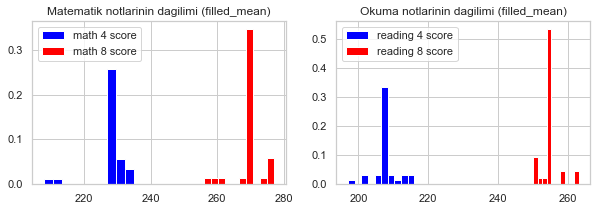

In [11]:
# mean ile tamamladigimiz degiskenlerin dagilimi

bins=10
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(cal_mean.AVG_MATH_4_SCORE, bins, normed=True, color='blue', label='math 4 score')
plt.hist(cal_mean.AVG_MATH_8_SCORE, bins, normed=True, color='red', label='math 8 score')
plt.title('Matematik notlarinin dagilimi (filled_mean)')
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.hist(cal_mean.AVG_READING_4_SCORE, normed=True, color='blue', label='reading 4 score')
plt.hist(cal_mean.AVG_READING_8_SCORE, normed=True, color='red', label='reading 8 score')
plt.title('Okuma notlarinin dagilimi (filled_mean)')
plt.legend(loc="upper left")
plt.show()

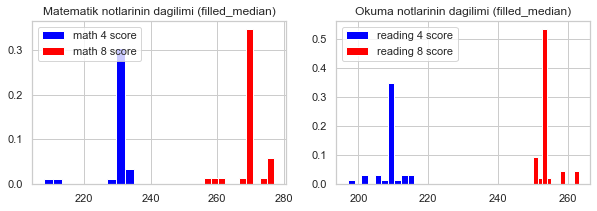

In [12]:
# median ile tamamladigimiz degikenlerin dagilimi

bins=10
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(cal_median.AVG_MATH_4_SCORE, bins, normed=True, color='blue', label='math 4 score')
plt.hist(cal_median.AVG_MATH_8_SCORE, bins, normed=True, color='red', label='math 8 score')
plt.title('Matematik notlarinin dagilimi (filled_median)')
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.hist(cal_median.AVG_READING_4_SCORE, normed=True, color='blue', label='reading 4 score')
plt.hist(cal_median.AVG_READING_8_SCORE, normed=True, color='red', label='reading 8 score')
plt.title('Okuma notlarinin dagilimi (filled_median)')
plt.legend(loc="upper left")
plt.show()

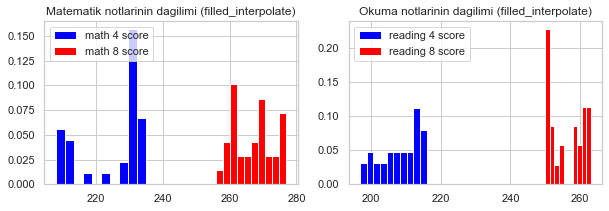

In [13]:
# enterpolasyon ile tamamladigimiz degiskenlerin dagilimi

bins=10
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(cal_interpolate.AVG_MATH_4_SCORE, bins, normed=True, color='blue', label='math 4 score')
plt.hist(cal_interpolate.AVG_MATH_8_SCORE, bins, normed=True, color='red', label='math 8 score')
plt.title('Matematik notlarinin dagilimi (filled_interpolate)')
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.hist(cal_interpolate.AVG_READING_4_SCORE, normed=True, color='blue', label='reading 4 score')
plt.hist(cal_interpolate.AVG_READING_8_SCORE, normed=True, color='red', label='reading 8 score')
plt.title('Okuma notlarinin dagilimi (filled_interpolate)')
plt.legend(loc="upper left")
plt.show()